In [1]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
import nltk 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns 
import scikitplot as skplt 
from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #класс оценок

#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import os
#print(os.listdir("../input"))

<h2>Read Data

In [57]:
df = pd.read_csv("C:/Users/User/Downloads/Twitter_Data.csv", encoding = 'latin-1', nrows=14000)

<h2>Show Data

In [58]:
df.head(11)

,clean_text,category
0,when modi promised âminimum government maxim...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
5,kiya tho refresh maarkefir comment karo,0
6,surat women perform yagna seeks divine grace f...,0
7,this comes from cabinet which has scholars lik...,0
8,with upcoming election india saga going import...,1
9,gandhi was gay does modi,1


<h2>Splitting the labels and the data separately

In [59]:
df.columns = ['Message', 'Label']
df.dropna(subset=['Message'], inplace=True)
df.head()

,Message,Label
0,when modi promised âminimum government maxim...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [60]:
df_labels = df['Label']
df_labels.head(11)

0    -1
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    1
Name: Label, dtype: int64

<h2>Data Visualization

In [52]:
# Stopwords
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

negative_dataset = df[df.Label == -1.0]
positive_dataset = df[df.Label == 1.0]
neutral_dataset = df[df.Label == 0.0]
neutral_words = ' '
positive_words = ' '
negative_words=''


In [40]:
for words in negative_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        negative_words = negative_words + word + " "
negative_words

'when modi promised â\x80\x9cminimum government maximum governanceâ\x80\x9d expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party didnâ\x80\x99 write chowkidar does mean â\x80\x99 anti modi try visit the plz not all who havenâ\x80\x99 used are anti with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh thiugh nehru not alive but still alive heart modi for every failure nehru responsible modi govts slashing indias education budget clear indicator that they dont care for 

In [41]:
for words in positive_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        positive_words = positive_words + word + " "

positive_words

' what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars answer who among these the most powerful world leader today trump putin modi may with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho gandhi was gay does modi things like demonetisation gst goods and services taxâ\x80¦the upper castes would sort either view favourably say that need give this more time other castes like dalits the muslims were more against because thatâ\x80\x99 just not modiâ\x80\x99 constituency2 hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi calm waters wheres

In [42]:
def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    




				 NEGATIVE WORDS


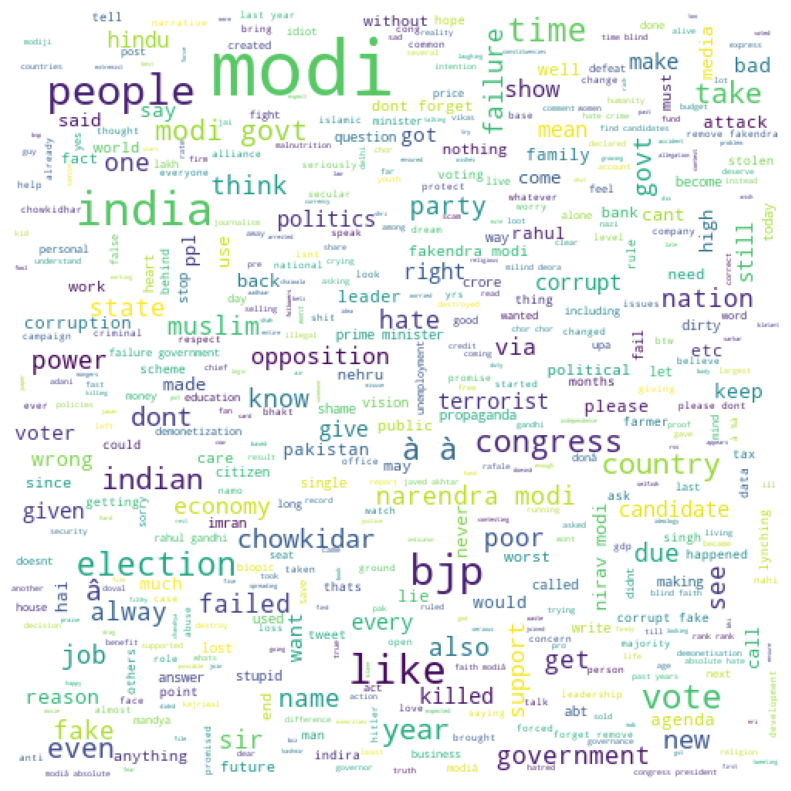

In [43]:
print("\n")    
print("\t\t\t\t NEGATIVE WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(negative_words)
gen_wordcloud(wordcloud)


				 POSITIVE WORDS


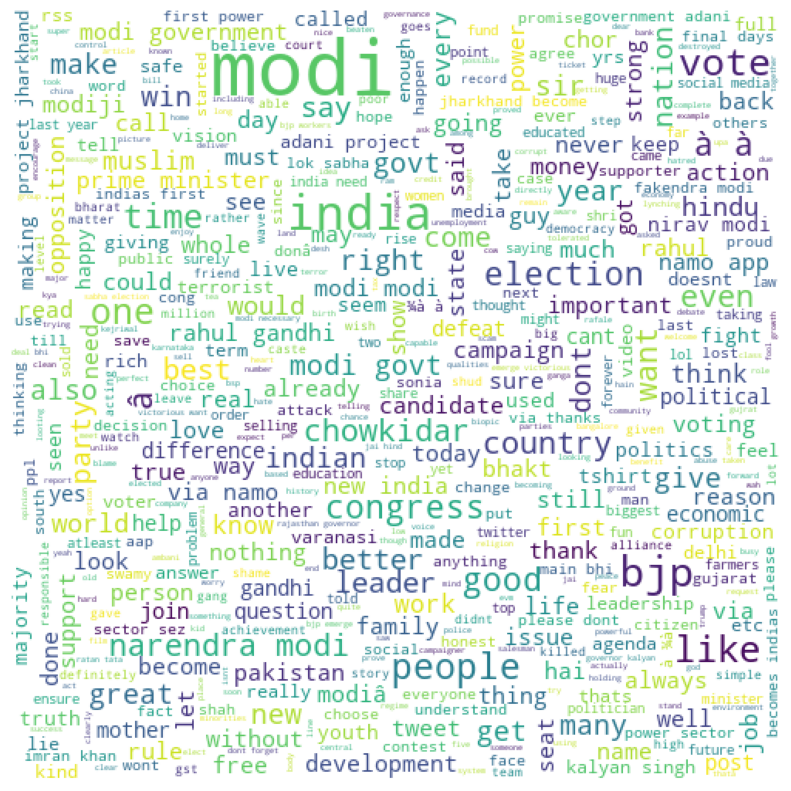

In [44]:

print("\t\t\t\t POSITIVE WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(positive_words)
gen_wordcloud(wordcloud)

In [45]:
for words in neutral_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        neutral_words = neutral_words + word + " "

neutral_words

' talk all the nonsense and continue all the drama will vote for modi kiya tho refresh maarkefir comment karo surat women perform yagna seeks divine grace for narendra modi become again this comes from cabinet which has scholars like modi smriti and hema time introspect one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his vote kar campaign one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his campaign vote modi who has not created jobs through our vote ensure govt need and deserve anupam kher responds modis appeal for the 2019 elections crush jaws those who shoutmodimodi says jds mla this inciting murder has already taken notice and ordered probe now time for modi take notice muslim family being harassed beaten recently extremist hindus and was suggested leave india move pakistan was waiting for this modi will also talk about varanasi according yogi imran masood kin azhar ma



				 NEUTRAL WORDS


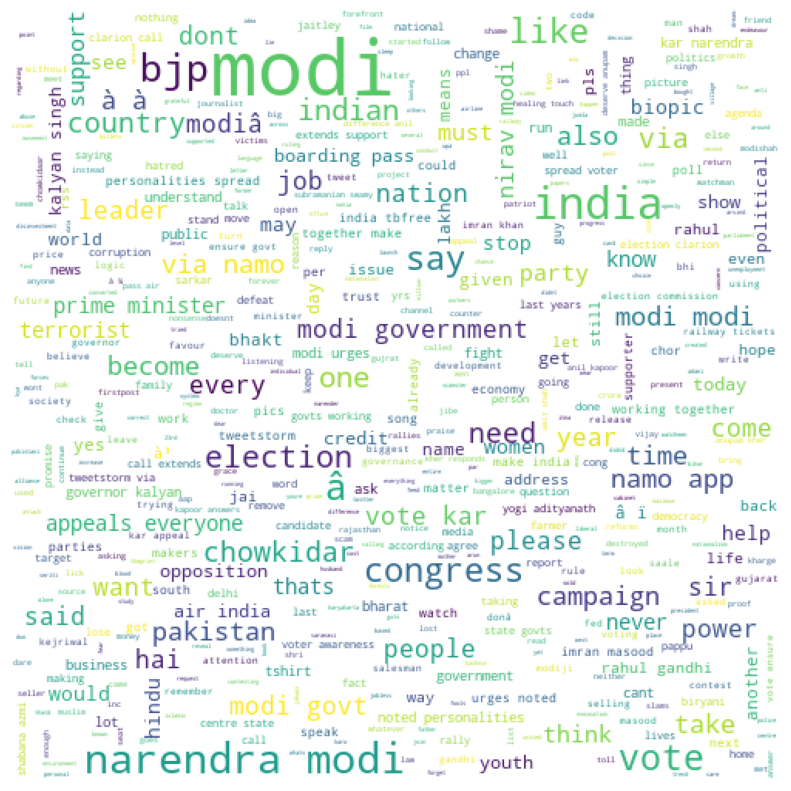

In [47]:
print("\n")    
print("\t\t\t\t NEUTRAL WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(neutral_words)
gen_wordcloud(wordcloud)


<h2>Plotting data % in pie chart

In [49]:
count_Class = pd.value_counts(df.Label, sort = True)
count_Class

 1    868
 0    705
-1    426
Name: Label, dtype: int64

In [52]:

# Data to Plot
labels = 'Positive', 'Neutral' , 'Negative'
sizes = [count_Class[0], count_Class[1] , count_Class[-1]]


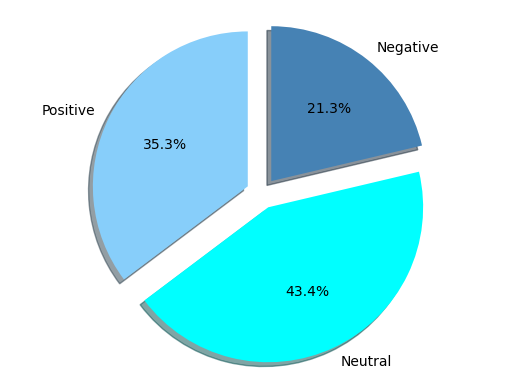

In [54]:
colors = ['lightskyblue', 'aqua','SteelBlue']

explode = (0.1, 0.1,0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

<h2>Splitting the Test and Train Data

In [61]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(9379, 2)
(4620, 2)

The Trainset consists of 9379 records and 2 features

The Testset consists of 4620 records and 2 features


<h2>Extracting N-grams from the Text Data

In [62]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Message)

# preparing for training set
x_train_df = countvect.transform(train_set.Message)

# preparing for test set
x_test_df = countvect.transform(test_set.Message)

<h2>Data Model
The Algorithms
<h6>
<p>Naive Bayes
<p>K-Nearest
<p>Decision Tree
<p>Support Vector Machine
<p>Random Forest


<h3>Naive Bayes Classifier

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

The accuracy of Naive Bayes clasifier is 54.047619047619044%

 [[ 375  161  559]
 [ 148  663  760]
 [ 196  299 1459]]


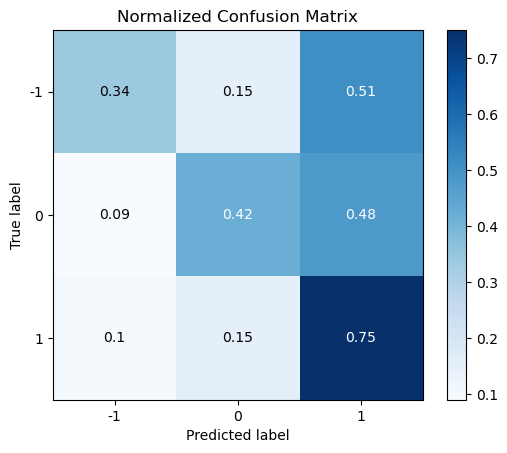

In [64]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()

The accuracy of Naive Bayes classifier is 54.047619047619044%
Precision: 0.55
Recall: 0.54
F1 Score: 0.53

Confusion Matrix:
 [[ 375  161  559]
 [ 148  663  760]
 [ 196  299 1459]]


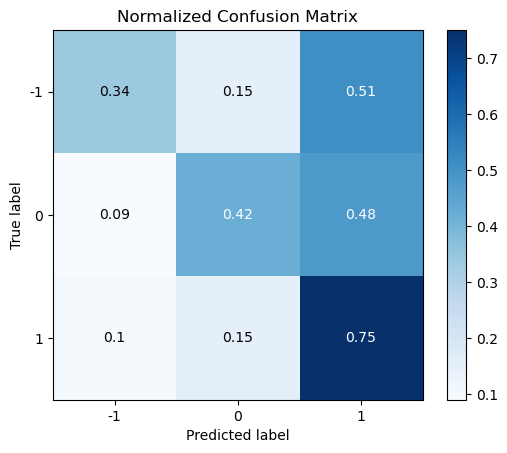

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import scikitplot as skplt

clf = MultinomialNB()
clf.fit(x_train_df, train_set.Label)
predicted_values_NB = clf.predict(x_test_df)

# Accuracy
accuracy_NB = accuracy_score(test_set.Label, predicted_values_NB)
print("The accuracy of Naive Bayes classifier is {}%".format(accuracy_NB * 100))

# Precision
precision_NB = precision_score(test_set.Label, predicted_values_NB, average='weighted')
print("Precision: {:.2f}".format(precision_NB))

# Recall
recall_NB = recall_score(test_set.Label, predicted_values_NB, average='weighted')
print("Recall: {:.2f}".format(recall_NB))

# F1 score
f1_NB = f1_score(test_set.Label, predicted_values_NB, average='weighted')
print("F1 Score: {:.2f}".format(f1_NB))

# Confusion matrix
confusion_matrix_NB = confusion_matrix(test_set.Label, predicted_values_NB)
print("\nConfusion Matrix:\n", confusion_matrix_NB)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize=True)
plt.show()




<h3>K-Nearest Neighbors algorithm

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0 0 0 ... 0 0 0]

The accuracy of K-Nearest Neighbors algorithm is 36.21212121212121%

 [[  26 1056   13]
 [   2 1551   18]
 [   1 1857   96]]


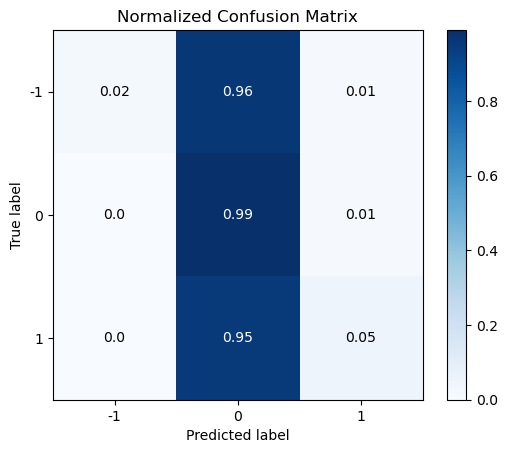

In [66]:
#KNN = KNeighborsClassifier(metric = 'euclidean')
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize = True)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of K-Nearest Neighbors algorithm is 36.21212121212121%
Precision: 0.65
Recall: 0.36
F1 Score: 0.22

Confusion Matrix:
 [[  26 1056   13]
 [   2 1551   18]
 [   1 1857   96]]


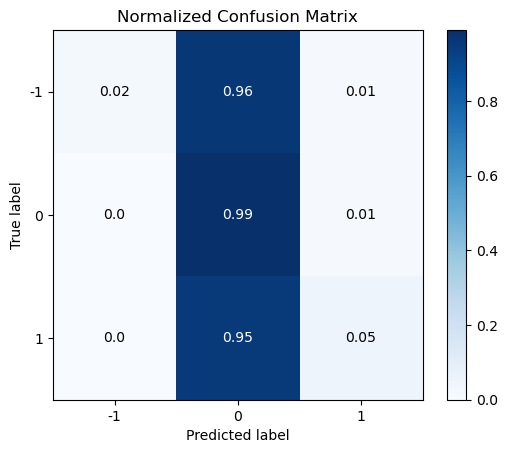

In [67]:


KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)

# Accuracy
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
print("The accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))

# Precision
precision_KNN = precision_score(test_set.Label, predicted_values_KNN, average='weighted')
print("Precision: {:.2f}".format(precision_KNN))

# Recall
recall_KNN = recall_score(test_set.Label, predicted_values_KNN, average='weighted')
print("Recall: {:.2f}".format(recall_KNN))

# F1 score
f1_KNN = f1_score(test_set.Label, predicted_values_KNN, average='weighted')
print("F1 Score: {:.2f}".format(f1_KNN))

# Confusion matrix
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\nConfusion Matrix:\n", confusion_matrix_KNN)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize=True)
plt.show()


<h2>Decision Tree learning

[1 1 0 ... 1 1 1]

The accuracy of Decision Tree learning is 53.52813852813853%

 [[ 366  427  302]
 [ 137 1130  304]
 [ 225  752  977]]


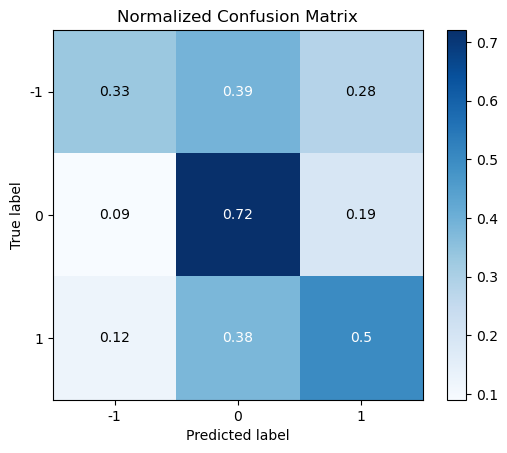

In [68]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize = True)
plt.show()


The accuracy of Decision Tree learning is 54.047619047619044%
Precision: 0.55
Recall: 0.54
F1 Score: 0.53

Confusion Matrix:
 [[ 369  429  297]
 [ 125 1158  288]
 [ 222  762  970]]


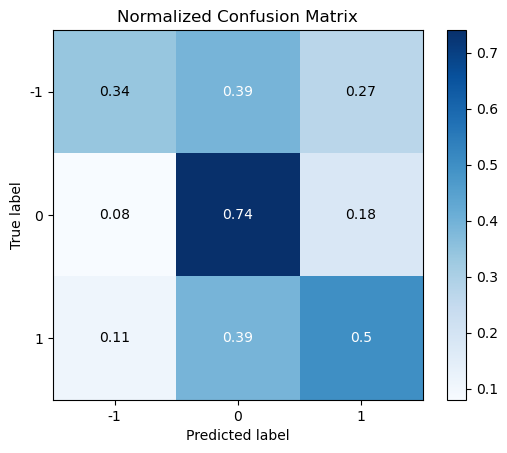

In [69]:


DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)

# Accuracy
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
print("The accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))

# Precision
precision_DT = precision_score(test_set.Label, predicted_values_DT, average='weighted')
print("Precision: {:.2f}".format(precision_DT))

# Recall
recall_DT = recall_score(test_set.Label, predicted_values_DT, average='weighted')
print("Recall: {:.2f}".format(recall_DT))

# F1 score
f1_DT = f1_score(test_set.Label, predicted_values_DT, average='weighted')
print("F1 Score: {:.2f}".format(f1_DT))

# Confusion matrix
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\nConfusion Matrix:\n", confusion_matrix_DT)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize=True)
plt.show()


<h2>Support Vector Machine (SVM)

[1 0 1 ... 1 1 0]

The accuracy of Support Vector Machine (SVM) is 46.99134199134199%

 [[ 111  805  179]
 [   3 1488   80]
 [  19 1363  572]]


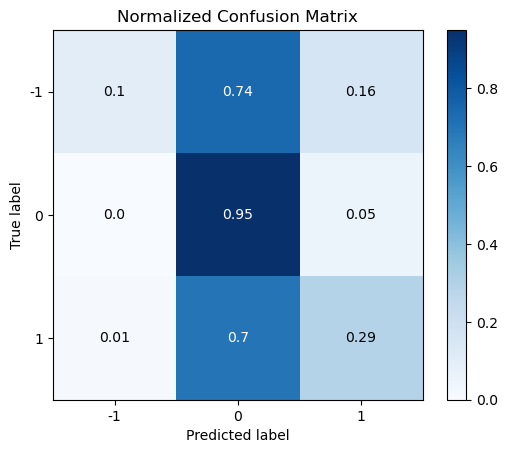

In [70]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize = True)
plt.show()

The accuracy of Support Vector Machine (SVM) is 46.99134199134199%
Precision: 0.63
Recall: 0.47
F1 Score: 0.41

Confusion Matrix:
 [[ 111  805  179]
 [   3 1488   80]
 [  19 1363  572]]


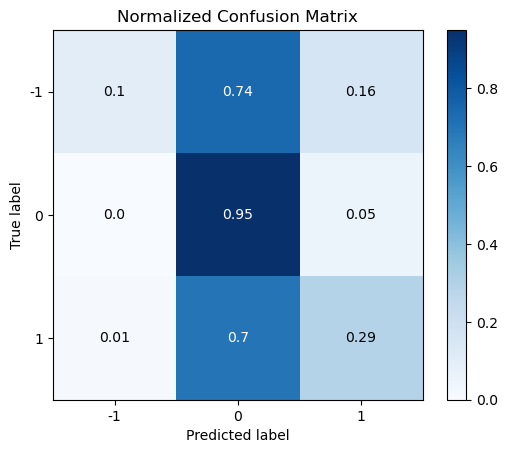

In [71]:


SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)

# Accuracy
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
print("The accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))

# Precision
precision_SVM = precision_score(test_set.Label, predicted_values_SVM, average='weighted')
print("Precision: {:.2f}".format(precision_SVM))

# Recall
recall_SVM = recall_score(test_set.Label, predicted_values_SVM, average='weighted')
print("Recall: {:.2f}".format(recall_SVM))

# F1 score
f1_SVM = f1_score(test_set.Label, predicted_values_SVM, average='weighted')
print("F1 Score: {:.2f}".format(f1_SVM))

# Confusion matrix
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\nConfusion Matrix:\n", confusion_matrix_SVM)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize=True)
plt.show()


<h2>Random Forest

[1 1 0 ... 1 1 1]

The accuracy of Random Forest is 54.87012987012987%

 [[ 279  655  161]
 [  11 1472   88]
 [  89 1081  784]]


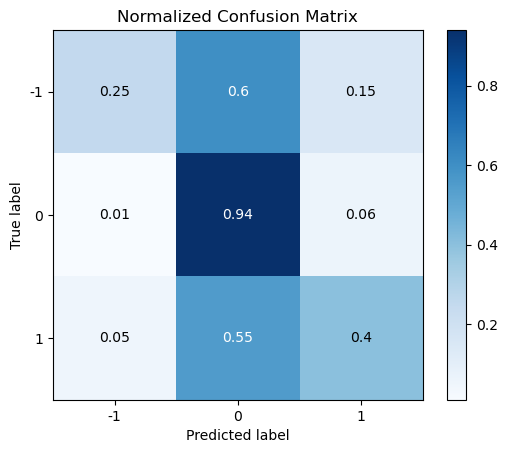

In [72]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
# n_estimators - количество деревьев в лесе
# oob_score - использовать ли образцы вне примеров для оценки точности обобщения
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize = True)
plt.show()

The accuracy of Random Forest is 54.87012987012987%
Precision: 0.65
Recall: 0.55
F1 Score: 0.52

Confusion Matrix:
 [[ 279  655  161]
 [  11 1472   88]
 [  89 1081  784]]


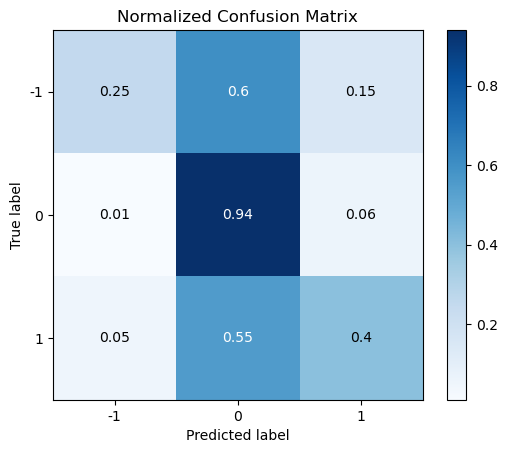

In [73]:
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)

# Accuracy
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
print("The accuracy of Random Forest is {}%".format(accuracy_RF * 100))

# Precision
precision_RF = precision_score(test_set.Label, predicted_values_RF, average='weighted')
print("Precision: {:.2f}".format(precision_RF))

# Recall
recall_RF = recall_score(test_set.Label, predicted_values_RF, average='weighted')
print("Recall: {:.2f}".format(recall_RF))

# F1 score
f1_RF = f1_score(test_set.Label, predicted_values_RF, average='weighted')
print("F1 Score: {:.2f}".format(f1_RF))

# Confusion matrix
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\nConfusion Matrix:\n", confusion_matrix_RF)

# Plotting the normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize=True)
plt.show()


<h2>Method Comparison

,Algorithms,Percentage
0,Naive Bayes,54.047619
1,K-Nearest Neighbors algorithm,36.212121
2,Decision Tree learning,53.528139
3,Support Vector Machine (SVM),46.991342
4,Random Forest,54.870130


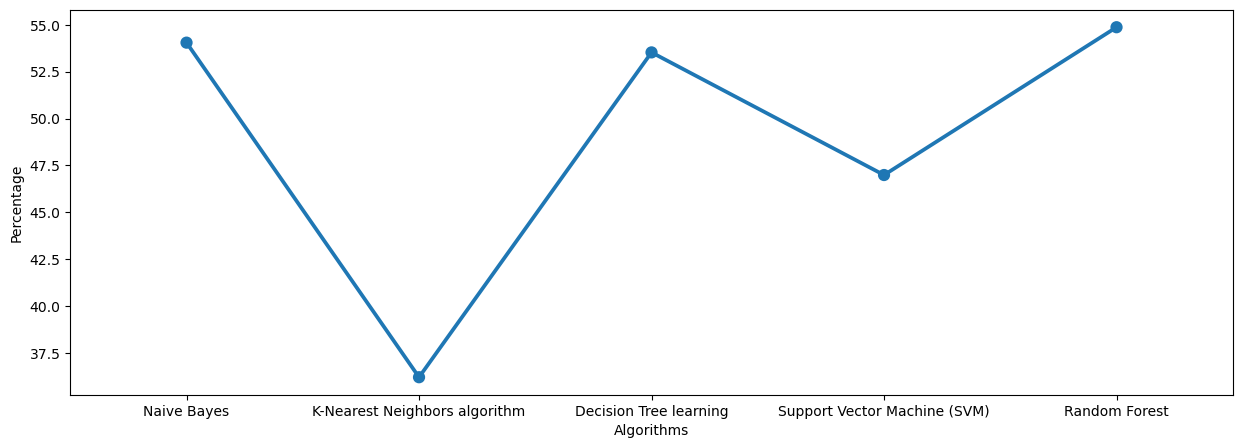

In [74]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);